In [1]:
# -*- coding: utf-8 -*-
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import pandas as pd
from pandas import Series
from pandas import DataFrame
import numpy as np
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体    
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题 
%matplotlib inline

In [2]:
def write_excel(df, name):
    writer = pd.ExcelWriter('%s.xlsx' % name, engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Sheet1',index=False)
    writer.save()

In [3]:
data = pd.read_csv("./export_20170522.csv.bak")
#设置列名
data.columns=["OrderNum", "Category", "Product", 
                     "Price", "Phone", "Address", "OrderDate", "OrderTime", "Status", "Channel"]

In [4]:
def removeChars(a):
    a = a.replace("_", "")
    # 删除*之后的所有字符串
    #a = a.replace("*","")
    pos = a.find("*")
    if pos != -1:
        return a[0:pos]
    return a

In [5]:

def getProvince2(a):
    pos = a.find("省")
    if pos != -1:
        return a[0:pos+1]
    # 启发式规则
    default_citys = ["上海市","北京市","重庆市","天津市"]
    for city in default_citys:
        if a.find(city) == 0:
            return city
    raise Exception("error province " + a)
    

In [6]:
def getProvince(a):
    a
    arrs = a.split("省")
    if len(arrs) >= 2:
        return arrs[0] + "省"
    # 启发式规则
    default_citys = ["上海市","北京市","重庆市","天津市","新疆维吾尔自治区","西藏自治区","广西壮族自治区","内蒙古自治区","宁夏回族自治区"]
    for city in default_citys:
        if a.find(city) == 0:
            return city
    raise Exception("error province " + a)

In [7]:
def getCity(a):
    if len(a) == 0:
        return "默认"
    
    arrs = a.split("市")
    if len(arrs) >= 2:
        return arrs[0] + "市"
    arrs = a.split("区")
    if len(arrs) >= 2:
        return arrs[0] + "区"
    arrs = a.split("县")
    if len(arrs) >= 2:
        return arrs[0] + "县"
    arrs = a.split("州")
    if len(arrs) >= 2:
        return arrs[0] + "州"
    
    return a + "市"


In [8]:
def getCity2(a):
    pos = a.find("市")
    if pos != -1:
        return a[0:pos+1]
    pos = a.find("县")
    if pos != -1:
        return a[0:pos+1]
    raise Exception("error city " + a)

In [9]:
prefix_to_province = [
    ("重*****重*****", "重庆市"),
    ("浙*****浙*****","浙江省"),
    ("云*****云*****","云南省"),
    ("四*****四*****","四川省"),
    ("上*****上*****","上海市"),
    ("陕*****陕*****","陕西省"),
    ("山*****山*****","山东省"),
    ("天*****天*****","天津市"),
    ("青*****青*****","青海省"),
    ("辽*****辽*****","辽宁省"),
    ("吉*****吉*****", "吉林省"),
    ("湖*****湖*****", "湖北省"),
    ("贵*****贵*****", "贵州省"),
    ("甘*****甘*****","甘肃省"),
    ("福*****福*****","福建省"),
    ("北*****北*****","北京市"),
    ("安*****安*****","安徽省")
    ]
province_to_realname = {
    "上海省": "上海市",
    "内蒙古省": "内蒙古自治区",
    "广西省": "广西壮族自治区",
    "新疆省": "新疆维吾尔自治区",
    "西藏省": "西藏自治区",
    "重庆省": "重庆市",
    "北京省": "北京市"
}
def handleSpecial(a):
    province = None;city = "默认"
    arrs = a.split()
    if len(arrs) >= 3 and arrs[0] == "中国大陆":
        province = arrs[1] + "省"
        city = removeChars(arrs[2])
        if province in province_to_realname:
            province = province_to_realname[province]
        
        if not city.endswith("市") and not city.endswith("区") and not city.endswith("县"):
            city  += "市"
    else:
        for prefix,province_str in prefix_to_province:
            if a.startswith(prefix):
                province = province_str
    if province == city:
        city = "默认"
    return province,city

city_convert_map = {
    "云南省" : ["昆明","昭通", "曲靖","玉溪", "怒江", "大理", "楚雄彝族自治", "德宏", "文山","文红河", "西双版纳", "迪庆藏族","红河哈尼族"],
    "内蒙古自治区" : ["乌兰察", "呼伦贝", "呼和浩", "巴彦淖", "鄂尔多", "锡林郭", "阿拉善","兴安盟"],
    "吉林省" : ["延边"],
    "四川省" : ["凉山彝族自治", "阿坝藏族羌族"],
    "宁夏回族自治区" :  ["中卫", "吴忠", "固原", "石嘴", "银川"],
    "广西壮族自治区": {
        "柳州" : "柳州市",
        "梧州" : "梧州市",
        "贺州" : "贺州市",
        "钦州" : "钦州市",
        "防城市" : "防城港市"
    },
    "新疆维吾尔自治区": {
        "乌市": "乌鲁木齐市",
        "乌鲁市": "乌鲁木齐市",
        "吐市": "吐鲁番市",
        "吐鲁市" : "吐鲁番市",
        "喀市" : "喀什市",
        "伊市" : "伊宁市"
    },
    "湖北省": {
       "恩施土家族苗市" :  "恩施市",
        "恩施土家族苗族市" : "恩施市"
    },
    "湖南省": {
         "湘西土家族苗市" : "湘西市",
        "湘西土家族苗族市" : "湘西市"
    },
    "甘肃省": {
        "临夏回族自治州市" : "临夏回族自治州",
        "临夏回族自治市" : "临夏回族自治州",
        "甘南藏族自治州市" : "甘南藏族自治州",
        "甘南藏族自治市" : "甘南藏族自治州"
    },
    "西藏自治区": {
        "昌都市" : "昌都地区"
    },
    "贵州省": {
        "毕节地区毕节市" : "毕节市",
        "毕节地区" : "毕节市",
        "铜仁地区铜仁市": "铜仁市",
        "铜仁地区" : "铜仁市",
        "黔东南苗族侗市": "黔东南苗族侗族市",
        "黔南布依族苗市": "黔南布依族苗族市",
        "黔西南布依族市": "黔西南布依族苗族市",
        "黔西南布依族苗市": "黔西南布依族苗族市",
    },
    
    "重庆市": {
        "水苗族土家市" : "水苗族土家族自治县",
        "秀山土家族苗市": "秀山土家族苗自治县",
        "酉阳土家族苗族市": "酉阳土家族苗族自治县"
    },
    
    "黑龙江省" : ["大兴安岭"]
    
}

def convertCity(province, city):
    if city == None:
        return city
    city_obj = []
    if province in city_convert_map:
        city_obj = city_convert_map[province]
        if type(city_obj) is list:
            for e in city_obj:
                if city.startswith(e):
                    return e
        if type(city_obj) is dict:
            if city in city_obj:
                return city_obj[city]
    return city

def splitAddress(a):
    try:
        province,city = handleSpecial(a)
        if province != None:
            city = convertCity(province,city)
            return Series({"Province": province, "City":city})
        a = removeChars(a)
        province = getProvince(a)
        b = a[len(province):]
        city = getCity(b)
        city = convertCity(province,city)
        if city == province:
            city = "默认"
        return Series({"Province": province, "City":city})
    except Exception as e:
        return Series({"Province" : None, "City":None})
    

In [10]:
areas = data.Address.apply(splitAddress)
data["Province"] = areas.Province
data["City"] = areas.City

In [14]:
## 省份为空的比例
sum(data.Province.isnull())*1.0/len(data.Province)

0.00063425904951751007

In [15]:
###省份为空的比例
not_null_provinces = data[data.notnull()][["Province", "City"]]
sum((not_null_provinces.City == "默认"))*1.0/len(not_null_provinces)

0.00067956326734018937

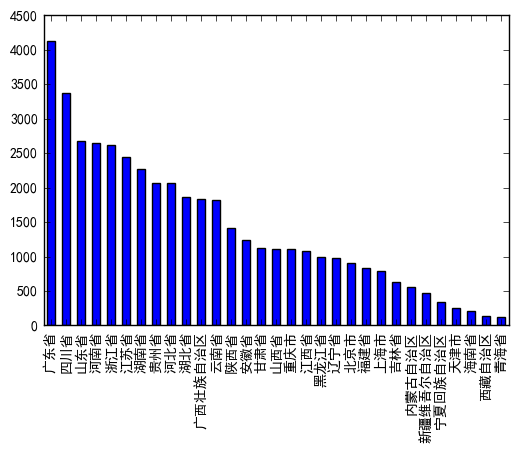

In [16]:
### 省->订单数量
province_2_order_nums = data.Province.value_counts()
province_2_order_nums.plot(kind='bar')

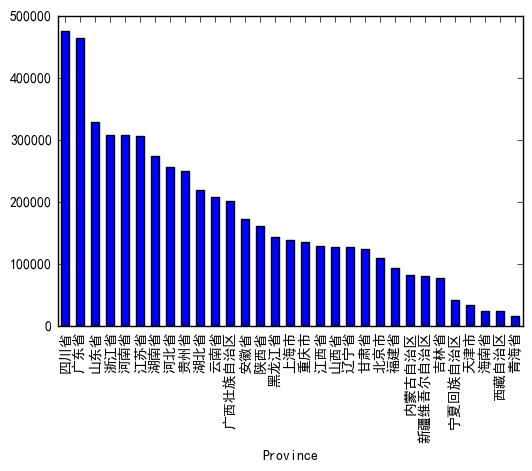

In [31]:
### 查看每个省的订单总额
### todo:如何调整plot的宽度设置?
price_grouped_by_province  = data['Price'].groupby(data['Province'])
price_grouped_by_province.sum().sort_values(ascending=False).plot(kind='bar')

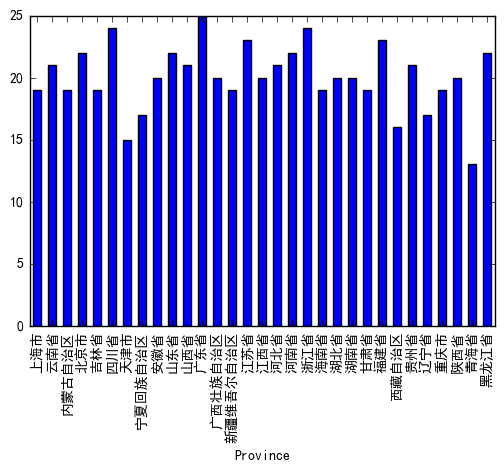

In [18]:
### province -> Category
category_grouped_by_province = data['Category'].groupby(data['Province'])
province_2_uniq_categories = category_grouped_by_province.apply(lambda a: len(a.unique()))
province_2_uniq_categories.plot(kind='bar')

In [64]:
a = data.Category.value_counts()

In [73]:
grouped = data.groupby("Province")

In [120]:
# 每个省的产品数量
# 每个省的数量最多的产品
# 每个省的价格最多的产品
# 每个省的产品均值
grouped["Price"].agg(['mean','max','min','count'])

,mean,max,min,count
Province,,,,
上海市,173.398241,22869.0,29.0,796
云南省,114.275824,2475.0,29.0,1820
内蒙古自治区,144.857651,11484.0,29.0,562
北京市,120.932522,594.0,29.0,904
吉林省,122.416933,3663.0,29.0,626
四川省,140.966142,38610.0,29.0,3367
天津市,128.732558,398.0,39.0,258
宁夏回族自治区,120.787425,398.0,39.0,334
安徽省,138.359903,19998.0,29.0,1242


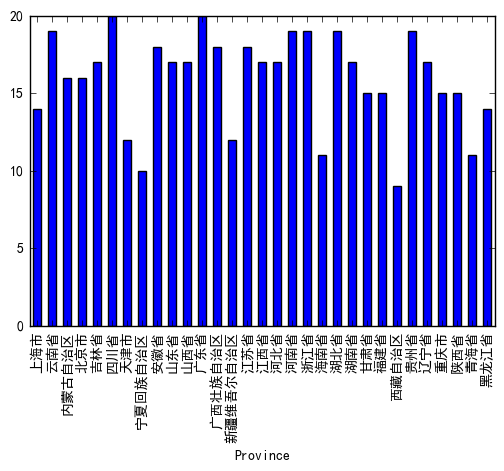

In [121]:
##省份->渠道汇总
grouped["Channel"].apply(lambda arr: len(arr.unique())).plot(kind='bar')

In [80]:
grouped_product = data.groupby("Category")

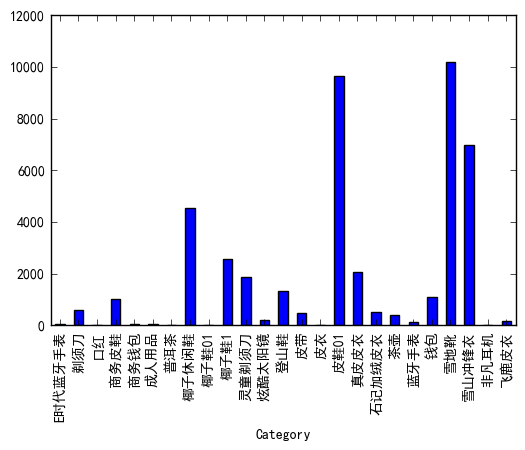

In [85]:
#产品->价格
grouped_product["Price"].count().plot(kind="bar")

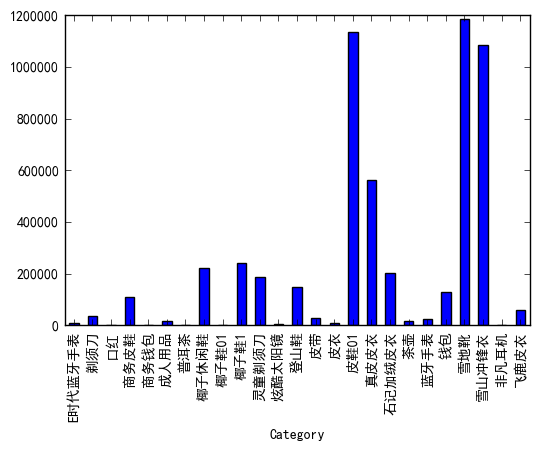

In [86]:
grouped_product["Price"].sum().plot(kind="bar")

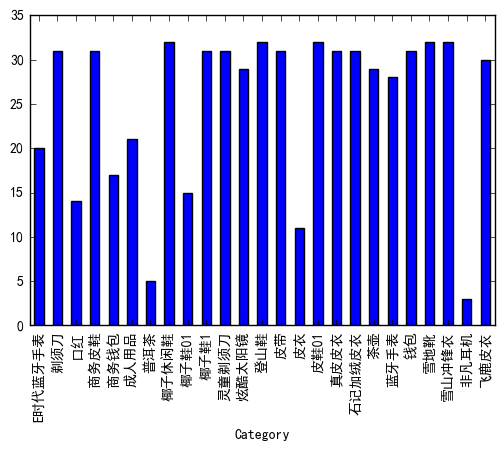

In [89]:
grouped_product["Province"].apply(lambda x:len(x.unique())).plot(kind='bar')

In [103]:
data["Hour"] = data.OrderTime.apply(lambda d:int(d.split(":")[0]))

In [104]:
## 根据时间进行汇聚
group_by_ordertime = data.groupby("Hour")

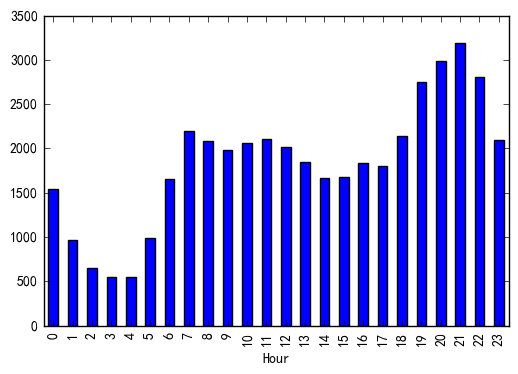

In [106]:
group_by_ordertime["Price"].count().sort_index().plot(kind='bar')

In [114]:
data.groupby(["Category","Hour"])["Price"].count().sort_values().tail(20)

Category  Hour
雪地靴       9       465
          10      468
皮鞋01      8       468
雪山冲锋衣     19      477
皮鞋01      18      484
雪地靴       8       489
皮鞋01      7       491
雪地靴       11      505
          18      506
          7       514
          23      514
雪山冲锋衣     21      529
皮鞋01      19      565
          22      591
雪地靴       22      621
          19      648
皮鞋01      20      686
          21      693
雪地靴       20      722
          21      748
Name: Price, dtype: int64

In [115]:
data.groupby(["Province","City"])["Price"].count().sort_values(ascending=False)



Province  City     
四川省       成都市          884
广东省       深圳市          782
          广州市          780
          东莞市          513
浙江省       杭州市          481
贵州省       贵阳市          469
江苏省       苏州市          444
陕西省       西安市          430
广东省       佛山市          421
浙江省       宁波市          399
贵州省       遵义市          396
河南省       郑州市          382
湖北省       武汉市          375
湖南省       长沙市          359
云南省       昆明           344
浙江省       金华市          343
河北省       石家庄市         339
广西壮族自治区   南宁市          338
山东省       潍坊市          332
浙江省       温州市          327
山东省       烟台市          307
          青岛市          306
贵州省       毕节市          298
河北省       保定市          296
云南省       昭通           270
河南省       南阳市          263
江苏省       无锡市          262
广东省       惠州市          254
浙江省       台州市          252
黑龙江省      哈尔滨市         250
                      ... 
新疆维吾尔自治区  五家市            5
青海省       海南藏族自治州        5
西藏自治区     那曲地区           5
海南省       屯昌县            5
          昌江黎族自治县        5
重庆市     

In [119]:
data.Category.value_counts().sort_index()

E时代蓝牙手表       48
剃须刀          585
口红            32
商务皮鞋        1035
商务钱包          35
成人用品          65
普洱茶           18
椰子休闲鞋       4560
椰子鞋01         32
椰子鞋1        2575
灵童剃须刀       1876
炫酷太阳镜        225
登山鞋         1342
皮带           472
皮衣            22
皮鞋01        9674
真皮皮衣        2051
石记加绒皮衣       507
茶壶           403
蓝牙手表         127
钱包          1102
雪地靴        10204
雪山冲锋衣       6981
非凡耳机           4
飞鹿皮衣         171
Name: Category, dtype: int64

In [122]:
# 
# 1. 地级市的详情，按照订单量，最大地级市、均值
#  2. 位置和订单量
#  3. 订单下单日期
#  4. 价格区间和省份，以及总的分布
#

In [21]:
#备份数据
data_copy = data.copy()
#建立时间索引
data.index = pd.to_datetime(data.OrderDate + " " + data.OrderTime)

In [22]:
# 下单日期和订单量的分布
### todo:坐标轴的时间范围如何调整
dayOfOrderNumber = data.OrderNum.resample('D').count()

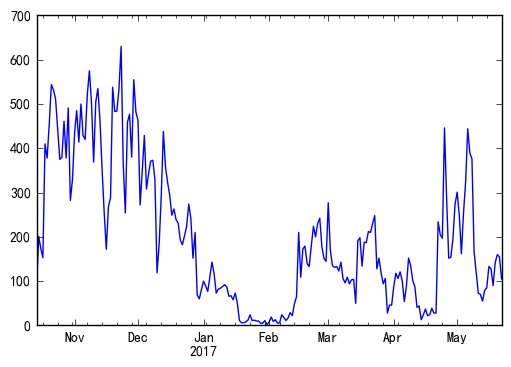

In [23]:
dayOfOrderNumber.plot(use_index=True)

In [24]:
write_excel(dayOfOrderNumber.reset_index(), "下单日期_订单量")

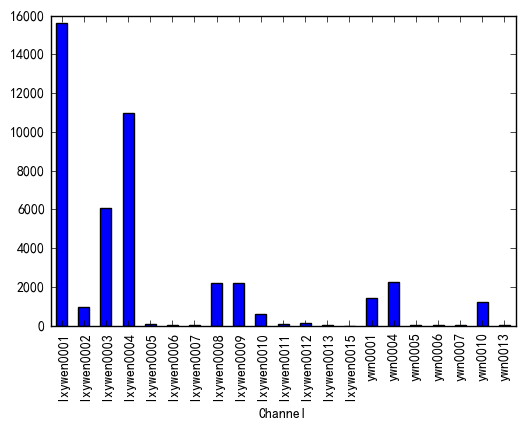

In [25]:
## 位置和订单量的关系
channel2ordernums = data.groupby("Channel")["OrderNum"].count()
channel2ordernums.plot(kind='bar')

In [27]:
write_excel(channel2ordernums.reset_index(),"位置_订单量")

In [28]:
# 价格区间和订单数量的分布
bins = [0,100,200,500,1000,2000,5000,10000,np.inf]
bin_names =["[0,100)","[100,200)", "[200,500)","[500,1000)", "[1000,2000)","[2000,5000)","[5000,10000)","10000以上"]
price_range_dist = pd.cut(data.Price, bins, labels=bin_names,right=False)

In [29]:
price_range_of_ordernum = data.OrderNum.groupby(price_range_dist).count()

In [30]:
write_excel(price_range_of_ordernum.reset_index(),"价格区间_订单量")

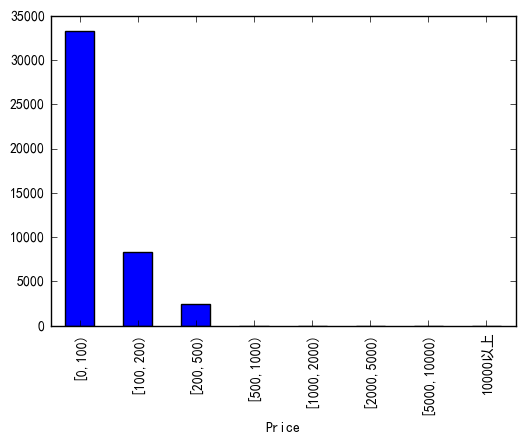

In [31]:
price_range_of_ordernum.plot(kind='bar')

In [32]:
## 价格区间和省份、城市的联系
price_range_and_city_of_ordernum = data.groupby([price_range_dist,"Province","City"])["OrderNum"].count()

In [34]:
write_excel(price_range_and_city_of_ordernum.reset_index(),"价格区间_省份_城市_订单量")

In [35]:
def sort_by_city(arr):
    return arr.groupby("City")["OrderNum"].count().sort_values(ascending=False)

In [36]:
## 根据省份，对每个市的订单数量进行统计，从大到小排序
order_num_by_province_city = data.groupby("Province").apply(sort_by_city)

In [37]:
write_excel(order_num_by_province_city.reset_index(),"省份_城市_订单量")

In [38]:
## 每个省订单量最大的城市以及订单数量
def province_get_details(arr):
    order_grouped_by_city = arr.groupby("City")
    
    order_counts = order_grouped_by_city["OrderNum"].count()
    max_city = order_counts.idxmax()
    max_cnt = order_counts[max_city]
    
    min_city = order_counts.idxmin()
    min_cnt = order_counts[min_city]
    
    mean = order_counts.mean()
    #return Series({"订单量最大城市":max_city, "最大订单量":max_cnt, "订单量最小城市": min_city, "最小订单量": min_cnt, 
    #               "订单量平均值": mean,
    #              "城市数量": len(order_counts)})
    return Series([max_city, max_cnt, min_city,min_cnt, mean,len(order_counts)],index = ["订单量最大城市","最大订单量", "订单量最小城市", "最小订单量", "订单量平均值", "城市数量"])

In [44]:
province_city_details = data.groupby("Province").apply(province_get_details)

In [45]:
write_excel(province_city_details.reset_index(), "省份订单分布")


In [46]:
## 按照二级标签进行汇总
data["Area2"] = data.Province + data.City

In [47]:
city_details = data.groupby("Area2")["OrderNum"].count().sort_values(ascending=False)
write_excel(city_details.reset_index(), "城市_订单数量")

In [48]:
city_details.reset_index()

,Area2,OrderNum
0,四川省成都市,885
1,广东省深圳市,783
2,广东省广州市,781
3,广东省东莞市,514
4,浙江省杭州市,481
5,贵州省贵阳市,469
6,江苏省苏州市,444
7,陕西省西安市,430
8,广东省佛山市,421
9,浙江省宁波市,399


In [140]:
data2 = data2.set_index("Time")

In [142]:
data2.index

DatetimeIndex(['2016-11-20 22:10:59', '2016-11-29 12:49:43',
               '2016-11-05 07:28:06', '2016-11-20 16:20:41',
               '2016-12-26 09:02:03', '2016-10-26 16:21:54',
               '2016-10-28 20:58:01', '2016-11-03 23:18:49',
               '2016-10-20 05:13:09', '2016-12-13 05:46:56',
               ...
               '2017-02-22 20:36:06', '2016-10-27 11:25:23',
               '2016-11-03 12:50:38', '2017-02-22 00:47:32',
               '2016-10-18 04:46:21', '2016-12-20 23:59:06',
               '2016-11-29 11:02:31', '2016-11-17 06:24:59',
               '2016-11-13 10:39:06', '2016-10-28 14:44:00'],
              dtype='datetime64[ns]', name=u'Time', length=44146, freq=None)

In [151]:
stamp=data2.index[0]

In [153]:
data2.ix[stamp]

OrderNum                   559815
Category                     皮鞋01
Product      男黑39码1双，赠:猎豹皮带（蓝黑随机）
Price                          99
Phone                 1359****377
Address           重庆市忠县忠州镇州屏*****
OrderDate              2016/11/20
OrderTime                22:10:59
Status                   等待客服最后确认
Channel                lxywen0001
Province                      重庆市
City                           忠县
Hour                           22
Name: 2016-11-20 22:10:59, dtype: object

In [154]:
data2.index.is_unique

False

In [155]:
data2.index = pd.to_datetime(data2.OrderDate + " " + data2.OrderTime)

In [156]:
data2.index

DatetimeIndex(['2016-11-20 22:10:59', '2016-11-29 12:49:43',
               '2016-11-05 07:28:06', '2016-11-20 16:20:41',
               '2016-12-26 09:02:03', '2016-10-26 16:21:54',
               '2016-10-28 20:58:01', '2016-11-03 23:18:49',
               '2016-10-20 05:13:09', '2016-12-13 05:46:56',
               ...
               '2017-02-22 20:36:06', '2016-10-27 11:25:23',
               '2016-11-03 12:50:38', '2017-02-22 00:47:32',
               '2016-10-18 04:46:21', '2016-12-20 23:59:06',
               '2016-11-29 11:02:31', '2016-11-17 06:24:59',
               '2016-11-13 10:39:06', '2016-10-28 14:44:00'],
              dtype='datetime64[ns]', length=44146, freq=None)

In [158]:
data.index

DatetimeIndex(['2016-11-20 22:10:59', '2016-11-29 12:49:43',
               '2016-11-05 07:28:06', '2016-11-20 16:20:41',
               '2016-12-26 09:02:03', '2016-10-26 16:21:54',
               '2016-10-28 20:58:01', '2016-11-03 23:18:49',
               '2016-10-20 05:13:09', '2016-12-13 05:46:56',
               ...
               '2017-02-22 20:36:06', '2016-10-27 11:25:23',
               '2016-11-03 12:50:38', '2017-02-22 00:47:32',
               '2016-10-18 04:46:21', '2016-12-20 23:59:06',
               '2016-11-29 11:02:31', '2016-11-17 06:24:59',
               '2016-11-13 10:39:06', '2016-10-28 14:44:00'],
              dtype='datetime64[ns]', length=44146, freq=None)

In [159]:
data.head()

,OrderNum,Category,Product,Price,Phone,Address,OrderDate,OrderTime,Status,Channel,Province,City,Hour
2016-11-20 22:10:59,559815,皮鞋01,男黑39码1双，赠:猎豹皮带（蓝黑随机）,99.0,1359****377,重庆市忠县忠州镇州屏*****,2016/11/20,22:10:59,等待客服最后确认,lxywen0001,重庆市,忠县,22
2016-11-29 12:49:43,570971,雪地靴,男款卡其39码1双，赠:（猎豹皮带、手表）*1套,99.0,1822****678,重庆市忠县忠州镇新华*****,2016/11/29,12:49:43,等待客服最后确认,lxywen0004,重庆市,忠县,12
2016-11-05 07:28:06,536569,皮鞋01,男黑41码1双，赠:猎豹皮带（蓝黑随机）,99.0,1592****012,重庆市忠县忠州镇人民*****,2016/11/5,7:28:06,等待客服最后确认,lxywen0003,重庆市,忠县,7
2016-11-20 16:20:41,559570,雪山冲锋衣,男款蓝色 2XL/A 赠：猎豹皮带、LXLG钱包,158.0,1582****828,重庆市忠县忠州镇红星*****,2016/11/20,16:20:41,等待客服最后确认,lxywen0003,重庆市,忠县,16
2016-12-26 09:02:03,599087,雪地靴,男款深蓝41码1双，赠:（手表、钱包、猎豹皮带）*1套,99.0,1816****061,重庆市忠县忠州镇弘海*****,2016/12/26,9:02:03,等待客服最后确认,lxywen0001,重庆市,忠县,9


In [160]:
data_copy.head()

,OrderNum,Category,Product,Price,Phone,Address,OrderDate,OrderTime,Status,Channel,Province,City,Hour
0,559815,皮鞋01,男黑39码1双，赠:猎豹皮带（蓝黑随机）,99.0,1359****377,重庆市忠县忠州镇州屏*****,2016/11/20,22:10:59,等待客服最后确认,lxywen0001,重庆市,忠县,22
1,570971,雪地靴,男款卡其39码1双，赠:（猎豹皮带、手表）*1套,99.0,1822****678,重庆市忠县忠州镇新华*****,2016/11/29,12:49:43,等待客服最后确认,lxywen0004,重庆市,忠县,12
2,536569,皮鞋01,男黑41码1双，赠:猎豹皮带（蓝黑随机）,99.0,1592****012,重庆市忠县忠州镇人民*****,2016/11/5,7:28:06,等待客服最后确认,lxywen0003,重庆市,忠县,7
3,559570,雪山冲锋衣,男款蓝色 2XL/A 赠：猎豹皮带、LXLG钱包,158.0,1582****828,重庆市忠县忠州镇红星*****,2016/11/20,16:20:41,等待客服最后确认,lxywen0003,重庆市,忠县,16
4,599087,雪地靴,男款深蓝41码1双，赠:（手表、钱包、猎豹皮带）*1套,99.0,1816****061,重庆市忠县忠州镇弘海*****,2016/12/26,9:02:03,等待客服最后确认,lxywen0001,重庆市,忠县,9


In [198]:
np.inf > 100

True

In [250]:
data.groupby(["City"])["OrderNum"].count().sort_values(ascending=False)

City
成都市          885
深圳市          783
广州市          781
东莞市          514
杭州市          481
贵阳市          469
苏州市          444
西安市          430
佛山市          421
宁波市          399
遵义市          396
郑州市          382
武汉市          375
长沙市          361
昆明           344
金华市          343
石家庄市         339
南宁市          338
潍坊市          332
温州市          327
烟台市          307
青岛市          306
毕节市          298
保定市          296
昭通           270
南阳市          263
无锡市          262
惠州市          254
台州市          252
常德市          250
            ... 
东方市            7
和平区            7
那曲地区           6
克孜市            6
万盛区            6
定安县            6
陵水黎族自治县        6
澄迈县            6
海南藏族自治州        5
屯昌县            5
昌江黎族自治县        5
五家市            5
阿里地区           4
玉树藏族自治州        4
保亭黎族苗族自治县      4
双桥区            4
红桥区            4
白沙黎族自治县        3
崇文区            3
温岭市            2
神农架林区          2
卢湾区            2
琼中黎族苗族自治县      2
图木市            2
黄南藏族自治州        1
五指山市           1
普宁市            1
靖边县      

In [268]:
tmp = data.groupby(["City"])["OrderNum"].count()

In [278]:
tmp.mean()

96.32751091703057

In [265]:
unicode(s)

u'\u6210\u90fd\u5e02'

In [335]:
aa = data[data.Province == "四川省"]

In [336]:
aa[aa.City == "海口市"]

,OrderNum,Category,Product,Price,Phone,Address,OrderDate,OrderTime,Status,Channel,Province,City,Hour,Area2
2017-05-14 14:22:26,836768,椰子休闲鞋,椰子休闲鞋男灰41码*1,39.0,1317****801,四川省_海口市_龙华*****省海口市龙华区红城湖路大英山路海航日月、一,2017/5/14,14:22:26,等待客服最后确认,ywn0010,四川省,海口市,14,四川省海口市
